In [1]:
using DataFrames, CSV, PyPlot

## Sand particles diameters

Manual measurement of 135 particles from two slices of X-ray micro-CT scan of BBR9 sample 5, undamaged.
I was not sure if the measured particles were really sand or not. I measured both the full, "solid" particles and porous ones -- the supposed limestone. I also measured some small particles that were angular and seemed like they may be an aggregate. I measured the largest visible diameter. Some particles were very thin, plate-like -- I measured their length.

In [2]:
sandDiameters=CSV.read("../data/sandDiametersBBR9.csv");

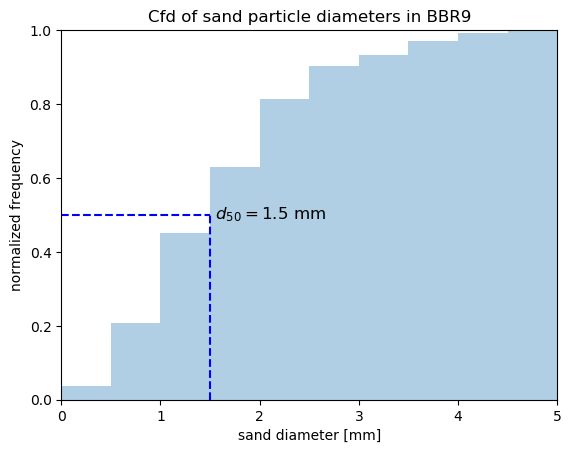

In [3]:
bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
hist(sandDiameters[!,:Length],bins=bins, normed=true, histtype="stepfilled",cumulative=true, alpha=0.35);
axvline(x=1.5,ymin=0,ymax=0.5, linestyle="--", color="blue")
axhline(y=0.5,xmin=0,xmax=0.3, linestyle="--", color="blue")
text(1.55, 0.475, L"$d_{50}=1.5$ mm", ha="left", va="bottom", size=12)
xlim(0,5)
ylim(0,1)
title("Cfd of sand particle diameters in BBR9")
xlabel("sand diameter [mm]")
ylabel("normalized frequency")
savefig("../figs/sandParticleCfd.png", dpi=200, pad_inches=0);

## Proportioning

Based on Tab. 1 *Effect of specimen geometry on triaxial compressive response of high-strength concrete, CompBuildMat, 2020*

![BBR9 composition](../data/bbr9Composition.png)

For x g of cement, we should use:

In [25]:
function props(cem)
    proportions=Dict(
        "cement"=>1*cem,
        "sand"=>2.25*cem,
        "slag"=>0.6*cem,
        "microsilica"=>0.26*cem,
        "water"=>0.37*cem,
        "hrwr"=>0.03*cem
    )
    return proportions
end

props (generic function with 1 method)

For specific gravities, we use the g/cm$^3$ density to compute equivalent weight of the specimen:

In [22]:
specGrav=Dict(
        "cement"=>3.15,
        "sand"=>2.57,
        "slag"=>2.95,
        "microsilica"=>2.20,
        "water"=>1.00,
        "hrwr"=>1.20
)

Dict{String,Float64} with 6 entries:
  "slag"        => 2.95
  "microsilica" => 2.2
  "water"       => 1.0
  "sand"        => 2.57
  "cement"      => 3.15
  "hrwr"        => 1.2

If we want a specimen of 25 mm diameter and 50 mm length, then we need a volume of:

In [67]:
diam=2.5 #cm
len=5 #cm

5

In [69]:
function volDims(diam, len)
    return pi*(diam/2)^2*len #cm3
end

volDims (generic function with 1 method)

In [70]:
vol=volDims(diam, len)

24.54369260617026

In [26]:
cem=10
proportions=props(cem)

Dict{String,Real} with 6 entries:
  "slag"        => 6.0
  "microsilica" => 2.6
  "water"       => 3.7
  "sand"        => 22.5
  "cement"      => 10
  "hrwr"        => 0.3

In [28]:
sum(values(proportions)) ## in g

45.099999999999994

In [31]:
function specVol(proportions, specGrav)
    return sum([proportions[k]/specGrav[k] for k in keys(proportions)])
end

specVol (generic function with 1 method)

In [37]:
collect(1:2:125)

63-element Array{Int64,1}:
   1
   3
   5
   7
   9
  11
  13
  15
  17
  19
  21
  23
  25
   ⋮
 103
 105
 107
 109
 111
 113
 115
 117
 119
 121
 123
 125

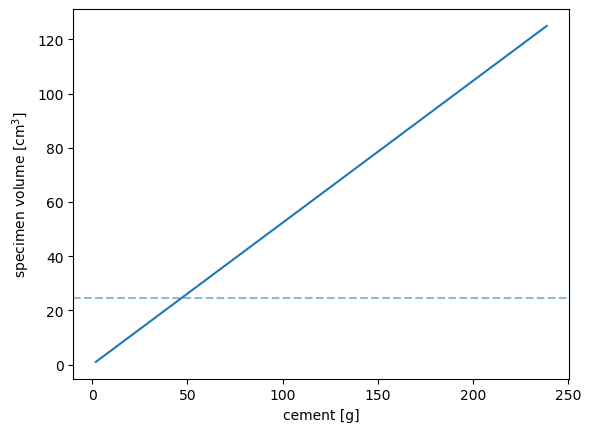

In [54]:
ws=1:2:125
plot([specVol(props(w), specGrav) for w=ws],ws)
xlabel("cement [g]")
ylabel("specimen volume [cm"*L"$^3$"*"]")
axhline(vol,linestyle="--", alpha=0.5);

The relation between cement weight and volume is linear:

In [58]:
a=specVol(props(1), specGrav)

1.9095183474735673

## Proportioning for a given specimen volume

In [77]:
diam=5.0 #cm
len=12.5 #cm
cem=volDims(diam, len)/a
print("$(cem) g of cement")

128.53342120877426 g of cement

In [78]:
props(cem)

Dict{String,Float64} with 6 entries:
  "slag"        => 77.1201
  "microsilica" => 33.4187
  "water"       => 47.5574
  "sand"        => 289.2
  "cement"      => 128.533
  "hrwr"        => 3.856

Weight of specimen in g

In [83]:
sum(values(props(cem)))

579.6857296515719

Volume of specimen in cm$^3$

In [85]:
specVol(props(cem), specGrav)

245.4369260617026

Density of obtained concrete in g/cm$^3$ (normal concrete 2.4)

In [86]:
sum(values(props(cem)))/specVol(props(cem), specGrav)

2.3618521424353216